# Исследование причин убыточности приложения Procrastinate Pro+

Внашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:лог сервера с данными об их посещениях,выгрузка их покупок за этот период,рекламные расходы. Известно, что последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

  **Цель исследования:**
 * Составить профили пользователей (откуда приходят, какими устройствами пользуюся)
 * Оценить экономические показатели: сколько стоит привлечение пользователей, сколко денег приносит каждый клиент
 * Выяснить, когда расходы на привлечени клиента окупаются
 * Выяснить факторы, влияющие на конверсию пльзователей в клиенты
 * Выяснить факторы, мешающие привлечению клиентов и приводящие к убыткам компании
 * Сформировать рекомендации для отдела маркетинга по формированию будующей стртегии и затрат на привлечения клиентов.
 
  **Ход исследования:**
 
  Исходные данные я получу из фалов visits_info_short.csv (информацией о посещениях сайта),orders_info_short.csv( информацию о заказах),costs_info_short.csv(информацию о расходах на рекламу). О качестве данных ничего не известно. Поэтому перед началом исследования данные нужно просмотреть, проверить на ошиби. На этапе предобработки постараюсь исправить возможные ошибки и неточности в исходных данных, по необходимости добавить новые столбцы. После того, как данные будут готовы, проведу исследовательский и маркетинговый анализ. Так как в исследовательском анализе потребуется много расчётов, которые можно совершить с помощью заранее подготовленных функций, вынесу эти функции перед началом анализа в отдельный блок. На основании проведенного анализа сформулирую выводы и рекомендации для отдела маркетинга.
  
Таким образом моё исследование пройдет этапы:
* Обзор данных
* Предобработка данных
* Задание функции для дальнейших расчётов
* Исследовательский анализ данных
* Исследование расходов на маркетинг
* Оценка окупаемости рекламы
* Общие выводы

 

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузка данных

* Загружаем библиотеки

In [1]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

* Откроем файлы и посмотрим основные сведения о данных, выведем первые 5 строк на экран

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
visits.info()
costs.info()
orders.info()
display (visits.head(),costs.head(),orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count 

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


#### Переименование столбцов

*  Пропусков в данных нет. Переименуем столбцы, оставив в названиях только прописные буквы и заменим пробелы на _

In [3]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
#visits =visits.rename(columns= {'User Id':'user_id', 'Region' : 'region', 'Device' : 'device', 'Channel': 'channel','Session Start': 'session_start','Session End':'session_end'})
#orders = orders.rename(columns = {'User Id':'user_id', 'Event Dt':'event_dt','Revenue':'revenue'})
#costs = costs.rename(columns = {'Channel':'channel'})

####  Изменение типа данных у столбцов с датами на date

In [4]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Удалим явные дубикаты, если они есть

In [5]:
visits = visits.drop_duplicates(keep = 'first')
orders = orders.drop_duplicates(keep = 'first')
costs = costs.drop_duplicates(keep = 'first')
print (len(visits),len(orders),len(costs))

309901 40212 1800


* Снова выведем основную информацию о данных в файле и первые 5 строк для того, чтобы посмотреть всели изменения корректно отобразились.

In [6]:
visits.info()
orders.info()
costs.info()
display (visits.head(),costs.head(),orders.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


**Столбцы переименованы, типы данных соответствуют содержимому столбцов, дубликатов и пропусков нет. Данные готовы к анализу**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для расчёта метрик

##### Создадим функцию для создания профилей пользователей

In [7]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

  
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
         profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    
    #costs = pd.concat([costs,new_users], keys = ['dt', 'channel'])
    
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] /costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt','channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


##### Создадим функцию для рассёта Retention Rate

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    users,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        users[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


##### Создадим функцию для подсчёта конверсии

In [9]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_order = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_order[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Cоздадим функция для подсчёта LTV и ROI

In [10]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 




#### Функции для визуализации

##### Функция для сглаживания фрейма

In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для визуализации удержания

In [12]:
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для визуализации конверсии

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Функция для визуализации LTV и ROI

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
 # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [15]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 
print ('Минимальная дата привлечения пользователей:',profiles['first_ts'].min(),\
       'Максимальная дата привлечения пользователей:', profiles['first_ts'].max() )

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

,customer,total_user,"payers,%"
region,,,
France,663,17450,3.799427
Germany,616,14981,4.111875
UK,700,17575,3.982930
United States,6902,100002,6.901862


<function matplotlib.pyplot.show(close=None, block=None)>

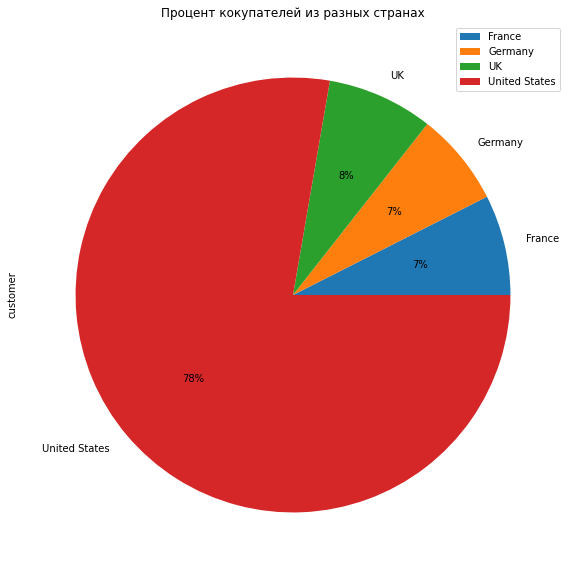

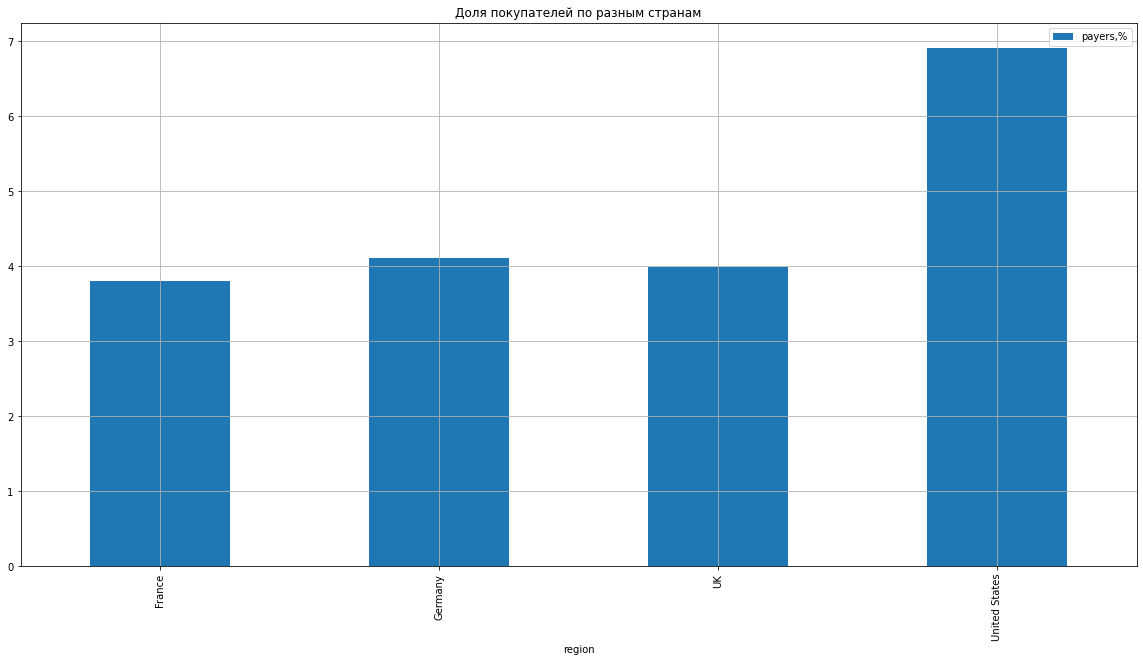

In [16]:
#Посчитаем сколько пользователей приходят из разгых стран:
pay = profiles.groupby('region')['user_id'].count().reset_index()
pay = pay.rename(columns = {'user_id':'total_user'})

#Составим таблицу с количеством покупателей из разных стран
country = profiles.groupby(['region', 'payer']).agg({'user_id':'nunique'}).query('payer == True').reset_index()

# Добавим в таблицу столбец с процентом покупателей по каждой стране
country = country.merge(pay, on = 'region')
country = country.rename(columns = {'user_id' : 'customer'})
country['payers,%'] = country['customer']/pay['total_user']*100
country = country.drop('payer', axis = 1).set_index('region')

display(country)
country.plot(kind = 'pie', x= 'region', y = 'customer',  autopct='%1.0f%%', figsize=(20,10), grid=True,title = 'Процент кокупателей из разных странах')
country.plot(kind = 'bar', y = 'payers,%',figsize=(20,10), grid=True,title = 'Доля покупателей по разным странам')
plt.show

**Вывод: больше всего пользователей приходит в приложение из Соединенных Штатов Америки, на эту же страну приходится самая большая доля покупателей: 6,9% пользователей совершают покупки. Меньше всего пользоватлей из Германии, а людей, готовых платить меньше всего во Франции.**

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

,customer,total_user,"payers,%"
device,,,
Android,2050,35032,5.851793
Mac,1912,30042,6.364423
PC,1537,30455,5.046790
iPhone,3382,54479,6.207897


<function matplotlib.pyplot.show(close=None, block=None)>

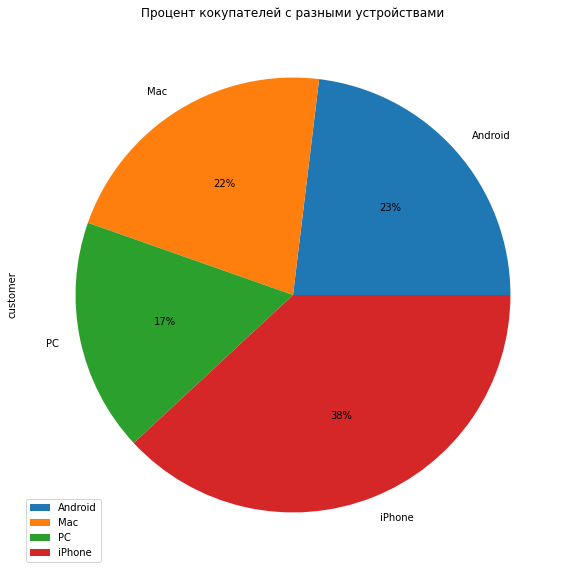

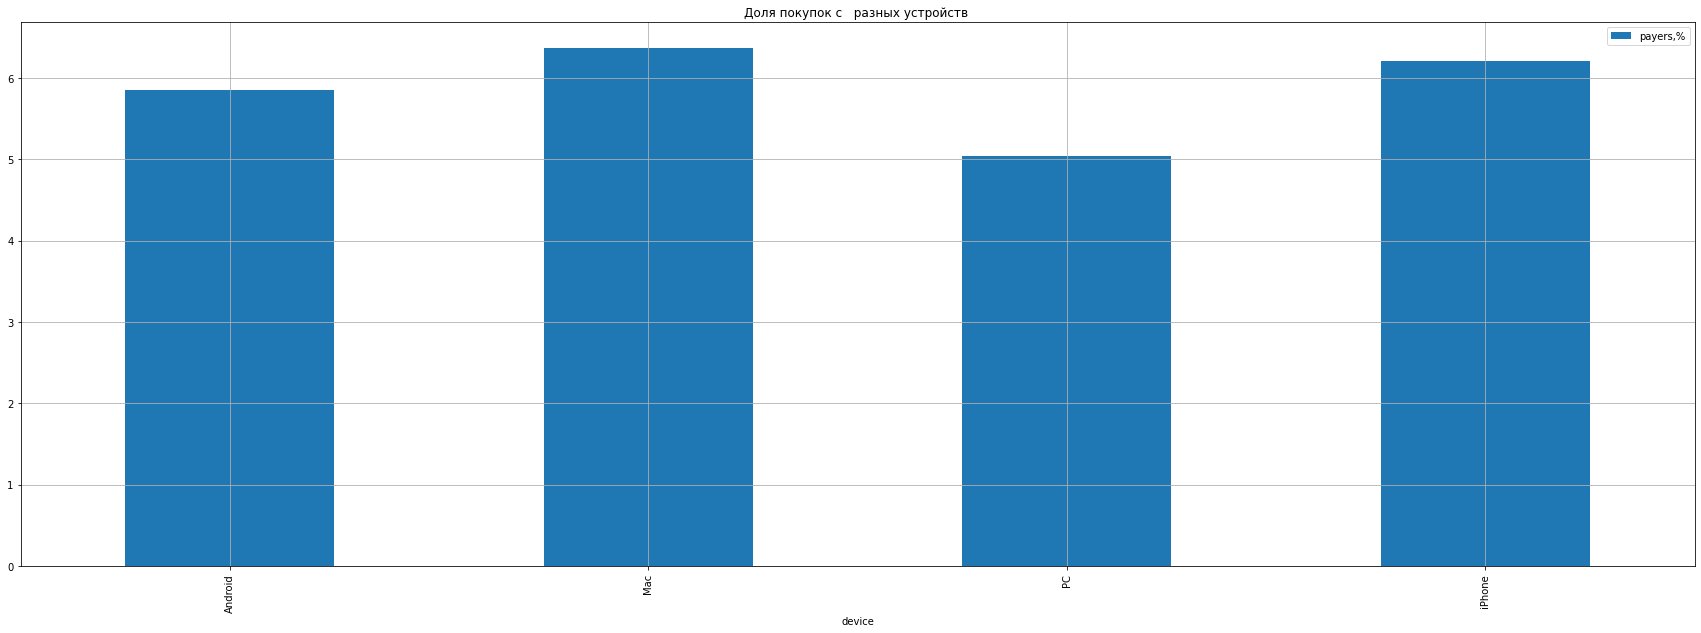

In [17]:
# Посчитаем сколько уникальных пользователей пользуются каждым устройством:
pay_d = profiles.groupby('device')['user_id'].count().reset_index()
pay_d = pay_d.rename(columns = {'user_id':'total_user'})
# Составим таблицу с количеством покупателей с разных устройств:
device_c = profiles.groupby(['device', 'payer']).agg({'user_id':'nunique'}).query('payer == True').reset_index()

# Добавим в таблицу столбец с процентом покупателей с каждого устройства:
device_c = device_c.merge(pay_d, on = 'device')
device_c = device_c.rename(columns = {'user_id' : 'customer'})
device_c['payers,%'] = device_c['customer']/pay_d['total_user']*100
device_c = device_c.drop('payer', axis = 1).set_index('device')
display(device_c)
device_c.plot(kind = 'pie', x= 'device', y = 'customer',  autopct='%1.0f%%', figsize=(30,10), grid=True,title = 'Процент кокупателей c разными устройствами')
device_c.plot(kind = 'bar', y ='payers,%',figsize=(30,10), grid=True,title = 'Доля покупок с   разных устройств ')
plt.show

**Вывод: самое популярное устройство среди пользователей - iPhone, Android и PC примерно на равных, реже всего пользователи используют MAC для работы с приложением. При этом процент покупок самый низкий c PC, показатель не критично отличается от аналогичного показателя с других устройств, но обратить внимание стоит, возможно следует сделать оплату с компьютера удобнее. Чаще всего покупки совершаются на Mac, скорее всго платежная система на этом устройстве настроена удобнее и качественнее, чем на других**

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

,customer,total_user,"payers,%"
channel,,,
AdNonSense,440,3880,11.340206
FaceBoom,3557,29144,12.204914
LeapBob,262,8553,3.063253
MediaTornado,156,4364,3.574702
OppleCreativeMedia,233,8605,2.707728
RocketSuperAds,352,4448,7.913669
TipTop,1878,19561,9.600736
WahooNetBanner,453,8553,5.296387
YRabbit,165,4312,3.826531


<function matplotlib.pyplot.show(close=None, block=None)>

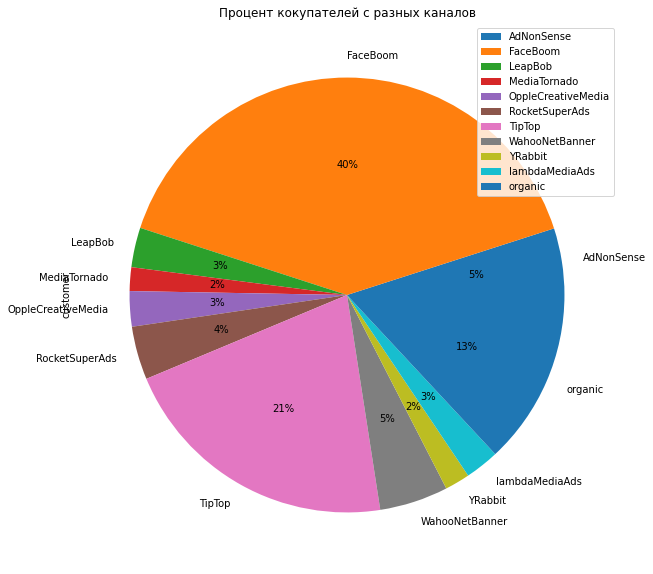

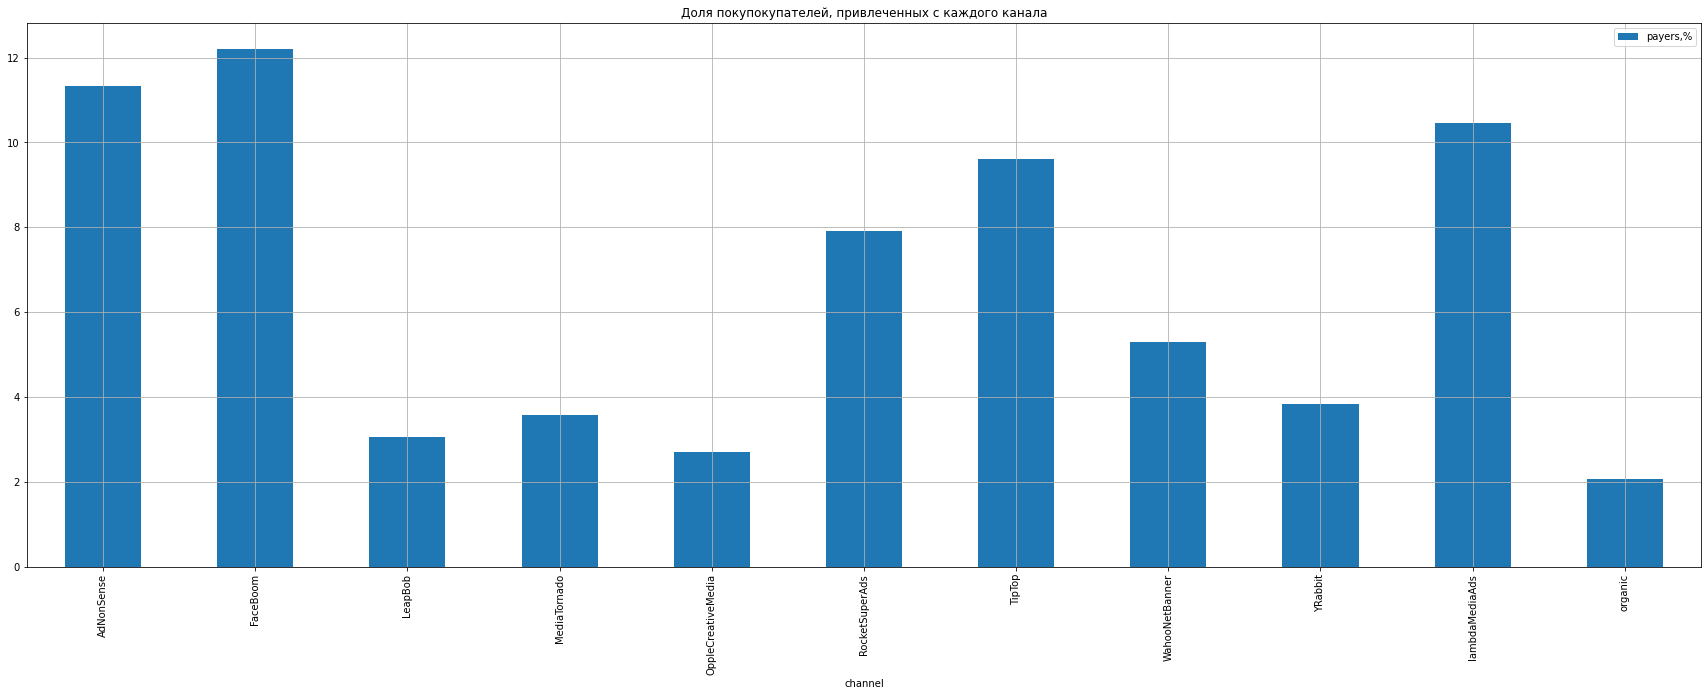

In [18]:
# Посчитаем сколько уникальных пользователей приходят с каждого канала привлечения:
pay_ch = profiles.groupby('channel')['user_id'].count().reset_index()
pay_ch = pay_ch.rename(columns = {'user_id':'total_user'})
# Составим таблицу с количеством покупателей с разных каналов:
channel_c = profiles.groupby(['channel', 'payer']).agg({'user_id':'nunique'}).query('payer == True').reset_index()

# Добавим в таблицу столбец с процентом покупателей с каждогоканала:
channel_c = channel_c.merge(pay_ch, on = 'channel')
channel_c = channel_c.rename(columns = {'user_id' : 'customer'})
channel_c['payers,%'] = channel_c['customer']/pay_ch['total_user']*100
channel_c = channel_c.drop('payer', axis = 1).set_index('channel')
display(channel_c)
channel_c.plot(kind = 'pie', x= 'channel', y = 'customer',  autopct='%1.0f%%', figsize=(30,10), grid=True,title = 'Процент кокупателей c разных каналов')
channel_c.plot(kind = 'bar', y ='payers,%',figsize=(30,10), grid=True,title = 'Доля покупокупателей, привлеченных с каждого канала')
plt.show

**Вывод:Больше всего "органических" пользователей, но процент покупателей среди них самый низкий: около 2% 'бесплатных' клиентов превращаются в покупателей. Канал FaceBoom привлекает самое большое число пользователей и хорошо 'конвертирует' их в покупателей.Не сильно отстаёт от него по этим показателям канал TipTop. Скорее всего в рекламу на этих канал следует вкладываться. Так же стоит обратить особое внимание на каналы AdNonSense и lambdaMediaAds.Процент покупок на них говорит о том, что пользователи готовы тратить свои деньги, но количество новых пользователей  мало.Возможно, как-то можно сделать эти каналы более заметными для широкой аудитории.Каналы LeapBob,OppleCreativeMedia несмотря на то, что привлекают достаточно много новых клиентов, показывают низкие проценты продаж. А каналы MediaTornado,YRabbit	не только не мотивируют покупать, но и новых пользователей не сильно прибавляют.Возможно, от рекламы на них стоит отказаться** 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг

In [19]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum(),2))

Общая сумма расходов на маркетинг: 105497.3


#### Посмотрим, как траты распределены по  рекламным источникам

channel
AdNonSense             3911.25
FaceBoom              32445.60
LeapBob                1797.60
MediaTornado            954.48
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
TipTop                54751.30
WahooNetBanner         5151.00
YRabbit                 944.22
lambdaMediaAds         1557.60
Name: costs, dtype: float64

<AxesSubplot:title={'center':'Распределение трат по каналам привлечения'}, ylabel='costs'>

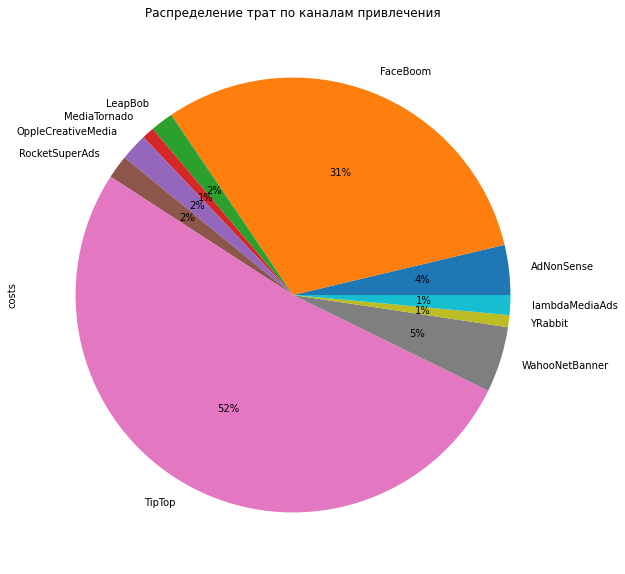

In [20]:
costs_by_channel = costs.groupby('channel')['costs'].sum()
display (costs_by_channel)
costs_by_channel.plot(kind = 'pie',  autopct='%1.0f%%', figsize=(30,10), grid=True,title = 'Распределение трат по каналам привлечения')

Text(0.5, 1.0, 'Динамика расходов по неделям по каждому источнику')

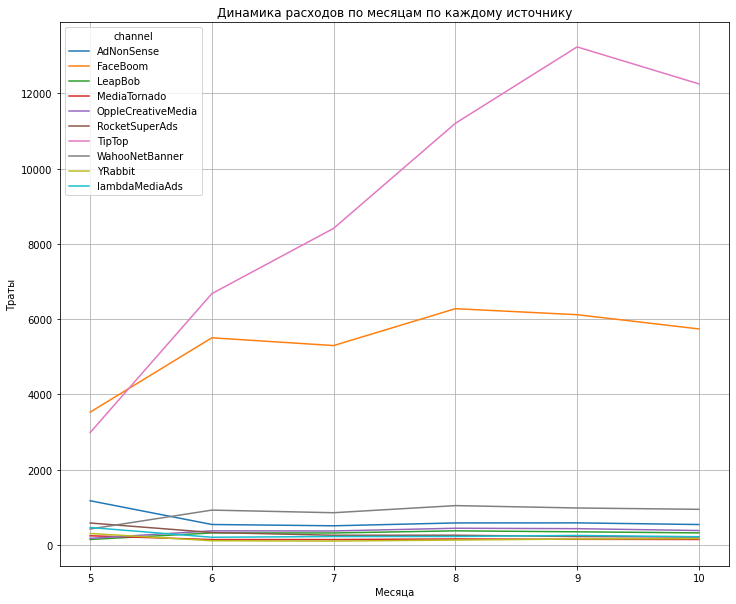

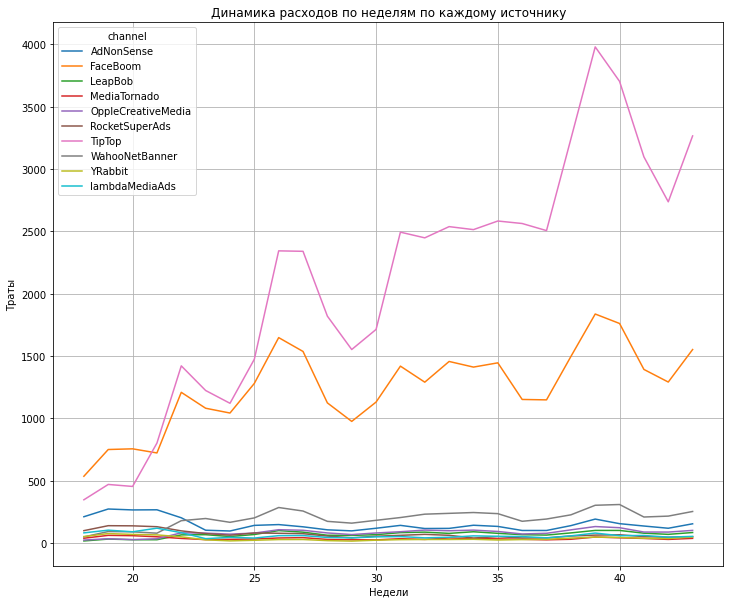

In [21]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

by_month =costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')
by_week =costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')
by_month.plot(figsize=(12, 10), grid = True)
plt.xlabel("Месяца")
plt.ylabel("Траты")
plt.title("Динамика расходов по месяцам по каждому источнику")
by_week.plot(figsize=(12, 10), grid = True)
plt.xlabel("Недели")
plt.ylabel("Траты")
plt.title("Динамика расходов по неделям по каждому источнику")

**Расходы на каналы TipTop сильно возрастают до сентября, потом немного снижаются. Растут расходы и по каналу FaceBoom до 8 месяца. На графике расходов по неделям можно отследить более детальную динамику расходов.Снижение расхожов на каналы TipTop и FaceBoom было приблизительно с 26 по 29 недели и с 38 по 43. А с 24 по 26 и с 36 по 37 недели наоборот наблюдается резкий рост трат на эти каналы. По остальным каналам траты стабильны.**

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [22]:
print('Средняя стоимость привлечения по проекту вцелом:', profiles['acquisition_cost'].mean())
cac = profiles.groupby(['channel'])['acquisition_cost'].mean()
display('Средняя стоимость привлечения из каждого источника:',cac)

Средняя стоимость привлечения по проекту вцелом: 0.7032778251826568


'Средняя стоимость привлечения из каждого источника:'

channel
AdNonSense            1.008054
FaceBoom              1.113286
LeapBob               0.210172
MediaTornado          0.218717
OppleCreativeMedia    0.250000
RocketSuperAds        0.412095
TipTop                2.799003
WahooNetBanner        0.602245
YRabbit               0.218975
lambdaMediaAds        0.724802
organic               0.000000
Name: acquisition_cost, dtype: float64

**Средняя стоимость привлечения нового клиента приблизительно 0,7. Дороже всего обходятся пользователи, пришедшие с канала TipTop. Клиенты с FaceBoom и AdNonSense обходятся более чем в два раза дешевле.Самые "дешёвые" пользователи приходят с каналов LeapBob,MediaTornado,YRabbit и OppleCreativeMedia. Стоимость "дешёвых" клиентов по сравнению в пользователями, привлеченными с TipTop отличается более, чем в 10 раз.Учитывая, что процент покупателей на каналах lambdaMediaAds и AdNonSense выше,а стоимость нового клиента сильно ниже, нежели у TipTop,считаю целесобразным перераспределить хотя бы часть бюджета TipTop в пользу каналов lambdaMediaAds и AdNonSense**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

* Установим момент и горизонт анализа

In [23]:
# Удалим из таблицы с профилеми пользователей с органическим трафикомеprofiles = profiles.query('channel != "organic"')
profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

* Посмотрим на графики LTV и ROI вцелом по проекту

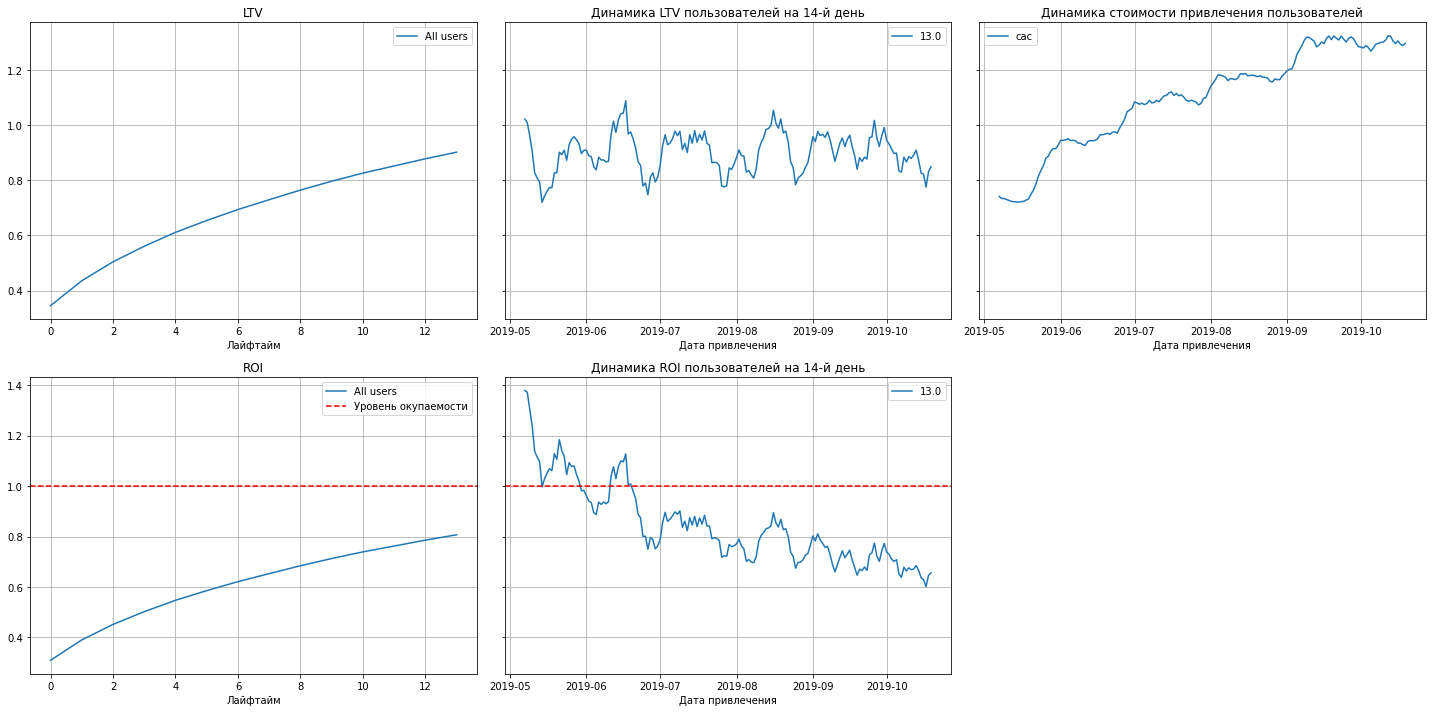

In [24]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**График LTV не вызывает подозрений,этот показатель достаточно стабилен. На графике возврата на инвестиции ROI видно, что линия окупаемости выше, значит инвестиции не окупаются. Стоимоть привлечения пользователей устойчиво растёт, а возврат на инвестиции снижается.**

* Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

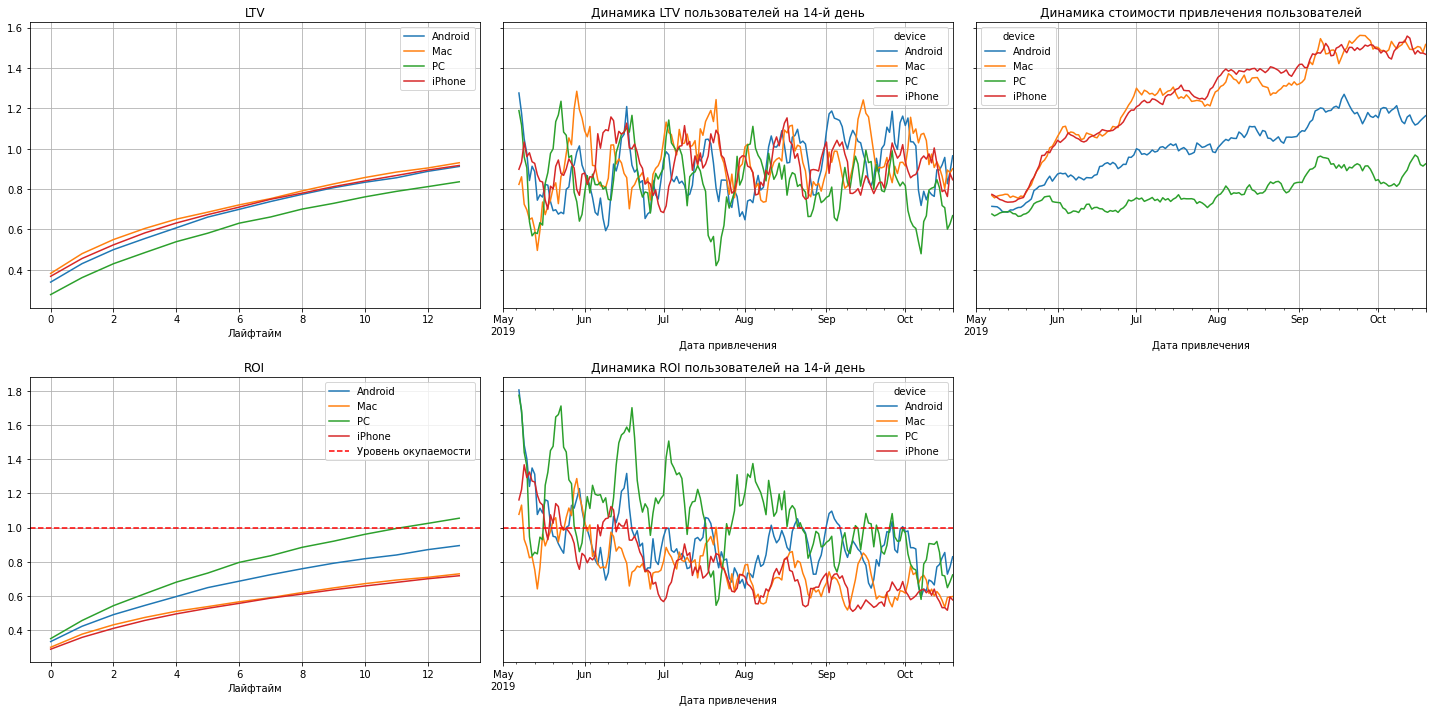

In [25]:
dimensions = ['device']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**LTV стабилен, стоимость привлечения клиентов растёт по всем устройствам. Надо отметить, что стоимость привлечения с устройств Apple выше,чем с Android и PC. Пользователи iPone,Mac и Android не окупаются .Приносят прибыль только клиенты с PCб которые обходятся компании дешевле всего.**

* Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

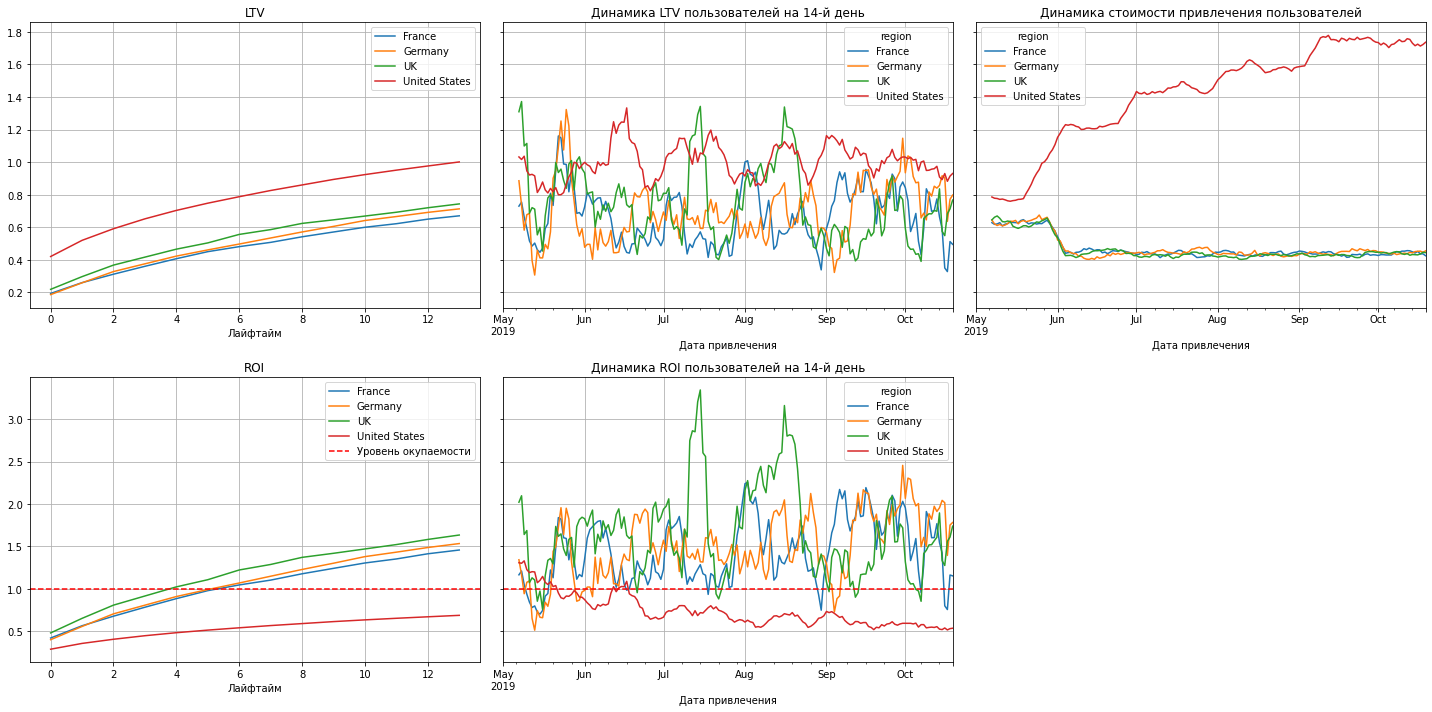

In [26]:
dimensions = ['region']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**LTV стабилен. Зато резко выделяется рост стоимости привлечения клиентов из США. Видимо, сильно увеличели рекламный бюджет на эту страну, а он совсем не окупается. При этом стоимоть привлечения клиентов из других стран снизилась к июню и осталась стабильно низкой.Пользователи из европейских стран стабильно приносит прибыль.**

* Проанализируем окупаемость рекламы с разбивкой по каналам привлечения. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

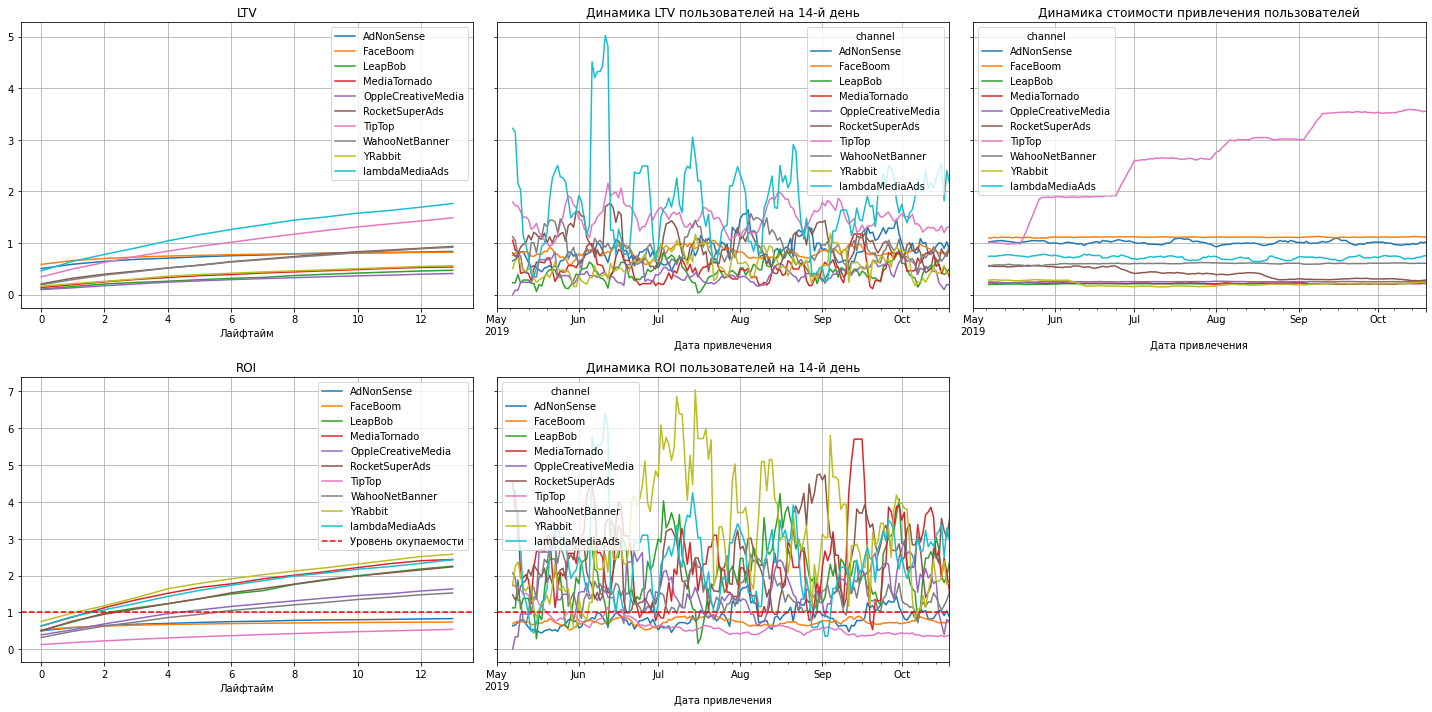

In [27]:
dimensions = ['channel']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Резко выросла стоимость привлечения с канала TipTop и эти вложения не оправдываются - клиенты не окупаются.Стоимость привлечения клиентов с остальных каналов стабильна, но так же стабильно не окупаются клиенты с каналов FaceBoom, TipTop, AdNonSense. Самые "дешевые" пользователи с канала YRabbit показывают лучший показатель окупаемости.**

#### Проверим конверсию пользователей и динамику её изменения.

* Для всех пользователей

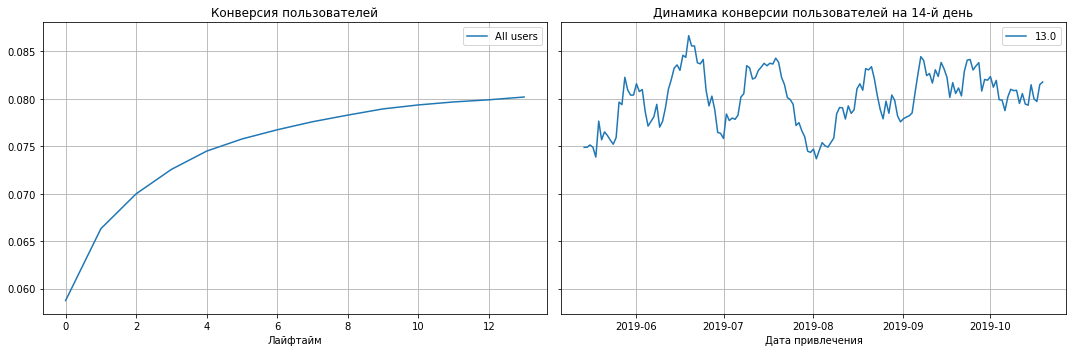

In [28]:
# Считаем конверсию пользователей
conversion_raw, conversion_grouped, conversion_history  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)
#Cтроим график
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* С разбивкой по странам

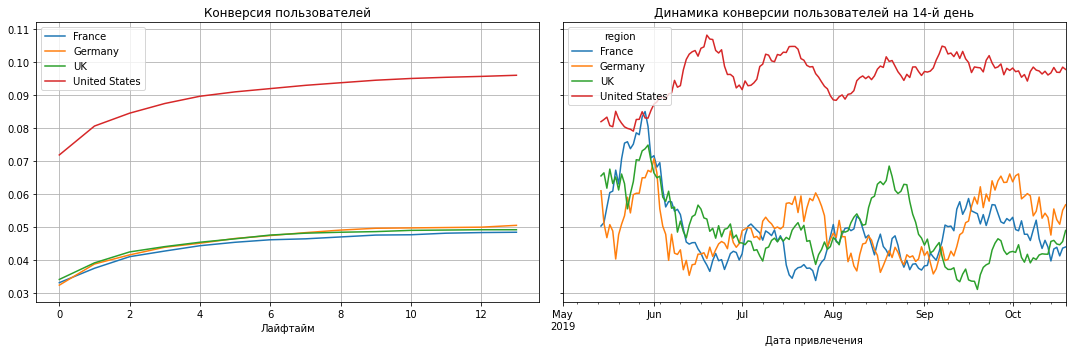

In [29]:
# Считаем конверсию пользователей
conversion_raw, conversion_grouped, conversion_history  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False)
#Cтроим график
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* C разбивкой по устройствам

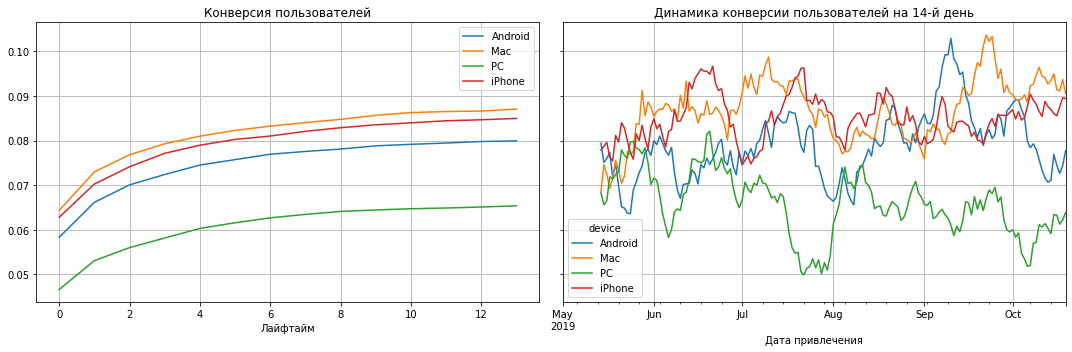

In [30]:
# Считаем конверсию пользователей
conversion_raw, conversion_grouped, conversion_history  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)
#Cтроим график
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* C разбивкой по каналам

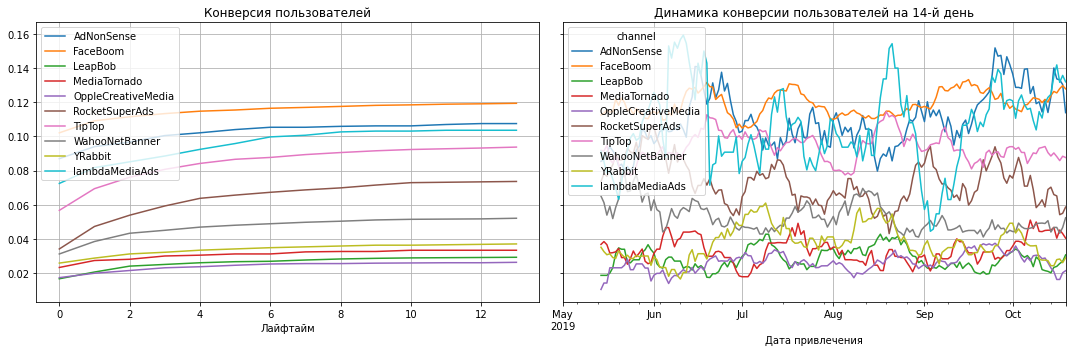

In [31]:
# Считаем конверсию пользователей
conversion_raw, conversion_grouped, conversion_history  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)
#Cтроим график
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Лучшие показатели конверсии у пользователей из США, использующих устройства Apple и пришедших с каналов FaceBoom и AdNonSense. Ниже всего - у  пользователей из Франции, использующих PC и пришедших с канала OppleCreativeMedia** 

#### Проверим удержание пользователей, построим и изучим графики удержания.

* Общее удержание

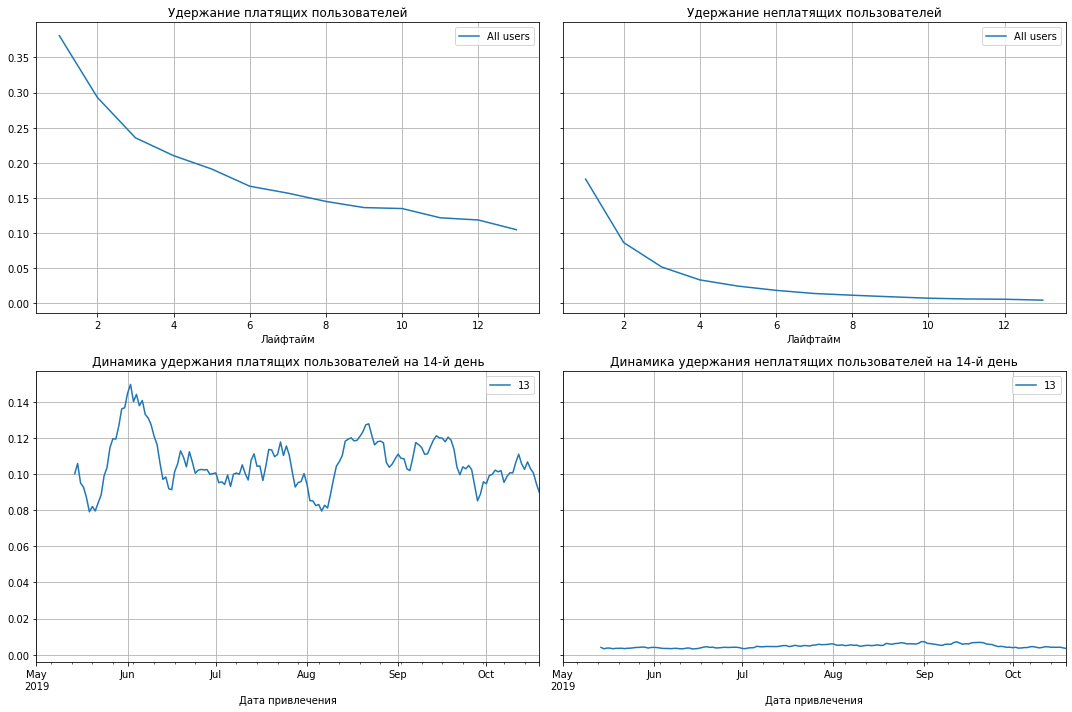

In [32]:
# Считаем удержание пользователей
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
#Cтроим график
plot_retention(retention_grouped, retention_history,horizon_days)
               


* Удержание, с разбивкой по странам

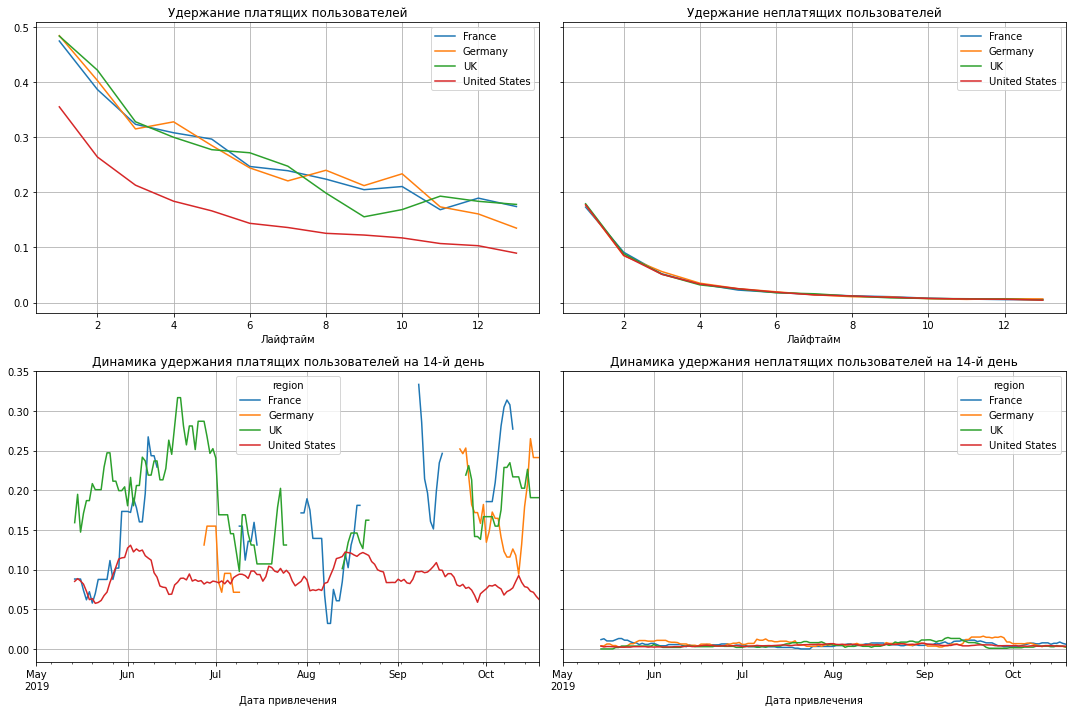

In [33]:

retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history,horizon_days)

* Удержание, с разбивкой по устройствам

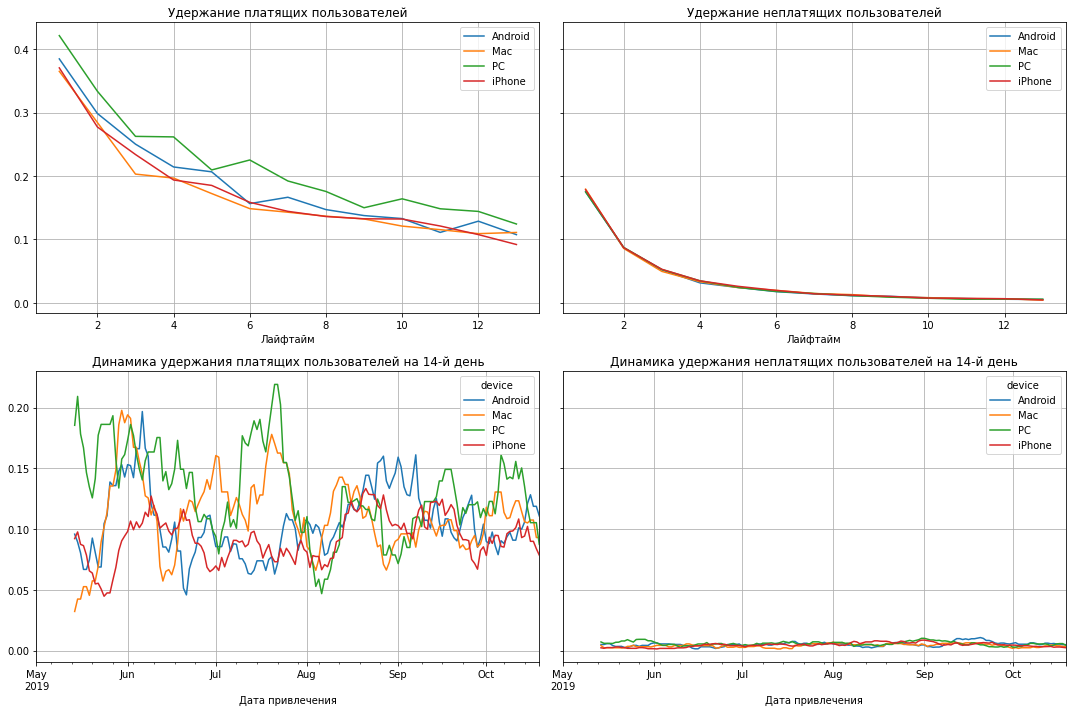

In [34]:
# Считаем удержание пользователей
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
#display(result_raw, result_grouped, result_in_time)
#Cтроим график
plot_retention(retention_grouped, retention_history,horizon_days)

* Удержание, с разбивкой по каналам

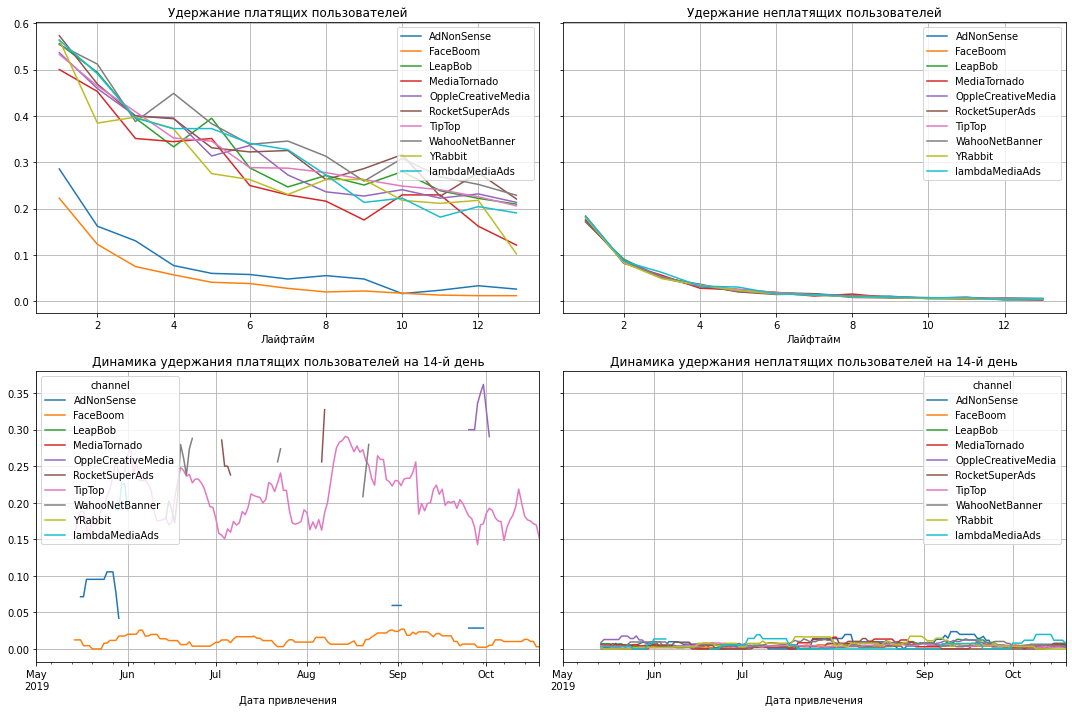

In [35]:
# Считаем удержание пользователей
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

#Cтроим график
plot_retention(retention_grouped, retention_history,horizon_days)

**Как и следовало ожидать, неплатящие пользователи удерживаются хуже, чем покупатели. На 14 день удержание "бесплатных" пользователей стремится к 0. Так же очень плохие показатели удержания у пользователей из США  и пришедших с канала FaceBoom и AdNonSense. Сильной разницы по удержанию в зависимости от используемого устройства нет, но пользователи с PC всё же самые преданные, а с iPhone быстрее прощаются с приложением.**

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Вывод: в результате работы над проектом была проведена предобработка данных и масштабный исследовательский анализ основных маркетинговых и бизнес показателей.** 
* По ходу исследования были составлены профили пользователей приложения. Выяснилось, что большинсвто пользователей и покупателей приходят из США, но стоимость привлечения клиентов из Америки сильно выросла за последние полгода и на момент исследования эти вложения не оправдались - показатель окупаемости инвестиций ниже уровня окупаемости. Считаю причиной этой "неудачи" слишком низкий показатель удержания клиентов из Америки. Следует продумать стратегию по удержанию американских клиентов либо сменить "фокус" на европейский рынок. Возможно, контент приложения больше ориентирован на европейский рынок,поэтому американцы быстро теряют интерес, а показатели удержания у Франции,Германии и Англии примерно одинаковы.Учитывая, что конверсия пользователей из Германии выше, на эту страну следует обратить повышенное внимание.
* Так же интересен тот факт, что большее количество пользователей и покупателей используют iPhone, но стоимоть привлечения клиентов с iPhone, видимо, слишком высока, а удержание низкое,что приводит к тому, что клиенты с iPhone не окупаются.Похожая ситуация и с пользователями Mac:высоая конверсия, но низкое удержание и высокая стоимость привлечения приводят к убыткам. Обратная ситуация с PC. Коверсия на них самая маленькая, но удержание самое большое, что при самой низкой цене привлечения выводит пользователей PC на первое место по окупаемости затрат. Вероятно, приложение удобнее всего пользоваться с PC, есть смысл "доработать" его для комфортного использования на iPhone и Mac. 
* Особое внимание было уделено исследованию расходов на рекламу на разных источниках привлечения клиентов. Выяснилось, что блее половины рекламного бюджета расходуется на канал TipTop,31% всего бюджета - на канал FaceBoom и эти вложения совсем не окупаются, несмотря на высокую конверсию, из-за слишком дорогой стоимости привлечения одного клиента и крайне низкого показателя удержания. Самым выгодным каналом привлечения является LambdaMediaAds - высокий показатель конверсии, средняя по всем каналам стоимость привлечения клиента, практически лучшая окупаемость, но крайне низкий бюджет - всего 1% от всех трат. Считаю целесообразным пересмотреть распределение бюджета в пользу данного канала. У каналов LeapBob, MediaTonado самая низкая стоимость привлечения клиента и небольшая, но стабильная конверсия и удержание, поэтому они стабильно хорошо окупаются. Даже если конверсию на этих каналах сильно не удастся повысить, стоит сохранять их ради имиджа компании и узнаваемости приложения.
